In [1]:
from IPython.display import Image
Image(url="https://storage.googleapis.com/kaggle-datasets-images/1417162/2347441/33d9f5bf223243529075f4566365f1c8/dataset-cover.jpg?t=2021-06-18-09-43-24")

# MOVIE RATING PREDICTION WITH PYTHON

*This project focuses on developing a predictive model to estimate movie ratings using various features like genre, director, and actors. The methodology involves analyzing historical movie data, including genre popularity trends and median ratings over different years, to identify factors impacting ratings. After data preprocessing and feature engineering, machine learning techniques such as Linear Regression, Random Forest Regression, and Gradient Boosting Regression are employed to build accurate rating prediction models. Additionally, other methods such as feature selection algorithms, cross-validation, and hyperparameter tuning are integrated to enhance model performance and robustness. By blending these methods, the project aims to gain insights into the influential factors behind movie ratings and provide a comprehensive framework for building reliable rating prediction models. The ultimate goal is to contribute to a deeper understanding of the dynamics influencing movie ratings and facilitate the development of models with improved accuracy and predictive power.*

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import chardet
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
with open("C:\\Users\\sahil\\CODSOFT\\MOVIE RATING PREDICTION WITH PYTHON\IMDb Movies India.csv", 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv("C:\\Users\\sahil\\CODSOFT\\MOVIE RATING PREDICTION WITH PYTHON\IMDb Movies India.csv", encoding=encoding)

In [4]:
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df['Rating'].skew()

-0.345551925659791

<Axes: xlabel='Rating', ylabel='Density'>

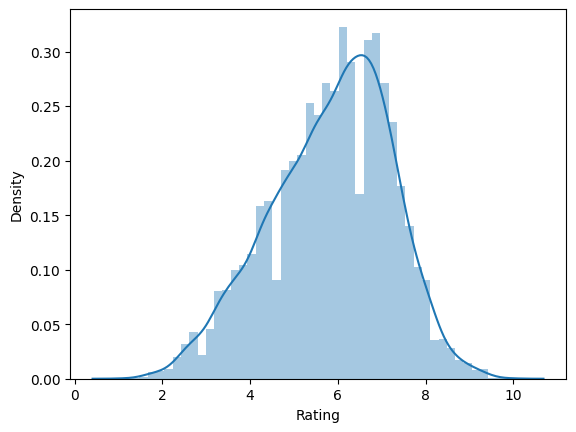

In [7]:
# Checking if the skew value is negative
# Plot the distribution of 'Rating' with kernel density estimation
sns.distplot(df['Rating'], kde=True)

In [8]:
# Fill missing values in the 'Year' column with 'Unknown'
df['Year'].fillna('Unknown', inplace=True)

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the counts of null values in each column
print(null_counts)

Name           0
Year           0
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [9]:
# Count the number of null values in the 'Rating' column
null_rating_count = df['Rating'].isnull().sum()

# Display the count of null values in the 'Rating' column
print(null_rating_count)

7590


In [10]:
# Filling the missing values in 'Rating' column with the median rating for each year group
df['Rating'].fillna(df.groupby('Year')['Rating'].transform('median'), inplace=True)

In [11]:
# Filling the missing values in 'Rating' column with the median rating of the entire column
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [12]:
# Filling the missing values in 'Duration' column with 0
df['Duration'].fillna(0, inplace=True)

In [13]:
# Displaying the first few rows of the 'Duration' column
print(df['Duration'].head())

0          0
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object


In [14]:
# Counting the number of null values in the 'Duration' column
null_duration_count = df['Duration'].isnull().sum()

In [15]:
# Displaying the count of null values in the 'Duration' column
print(null_duration_count)

0


In [16]:
# Extracting numerical part of duration and convert it to numerical format
df['Duration_numeric'] = df['Duration'].str.extract(r'(\d+)').astype(float)

In [17]:
# Extracting unit part of duration and store it in a separate column
df['Duration_unit'] = df['Duration'].str.extract(r'(\D+)')

In [18]:
# Displaying the modified DataFrame
print(df.head())

                                 Name     Year Duration            Genre  \
0                                      Unknown        0            Drama   
1  #Gadhvi (He thought he was Gandhi)   (2019)  109 min            Drama   
2                         #Homecoming   (2021)   90 min   Drama, Musical   
3                             #Yaaram   (2019)  110 min  Comedy, Romance   
4                   ...And Once Again   (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0    6.20   NaN       J.S. Randhawa      Manmauji              Birbal   
1    7.00     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2    6.85   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3    4.40    35          Ovais Khan       Prateik          Ishita Raj   
4    5.50   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  Duration_numeric Duration_unit  
0  Rajendra Bhatia               NaN           NaN 

In [19]:
# Counting the number of null values in the 'Duration_numeric' column
null_duration_numeric_count = df['Duration_numeric'].isnull().sum()

In [20]:
# Displaying the count of null values in the 'Duration_numeric' column
print(null_duration_numeric_count)

8269


In [21]:
# Filling missing values in 'Duration_numeric' column with the median duration for each year group
df['Duration_numeric'].fillna(df.groupby('Year')['Duration_numeric'].transform('median'), inplace=True)

In [22]:
# Filling missing values in 'Duration_numeric' column with the median duration of the entire column
df['Duration_numeric'].fillna(df['Duration_numeric'].median(), inplace=True)

In [23]:
# Retrieve unique values in the 'Duration_unit' column
unique_duration_units = df['Duration_unit'].unique()

In [24]:
# Display the unique values
print(unique_duration_units)

[nan ' min']


In [25]:
# Filling missing values in 'Duration_unit' column with the mode (most frequent value)
df['Duration_unit'].fillna(df['Duration_unit'].mode()[0], inplace=True)

In [26]:
# Calculating the sum of null values in each column
null_values_count = df.isnull().sum()

In [27]:
# Displaying the count of null values in each column
print(null_values_count)

Name                   0
Year                   0
Duration               0
Genre               1877
Rating                 0
Votes               7589
Director             525
Actor 1             1617
Actor 2             2384
Actor 3             3144
Duration_numeric       0
Duration_unit          0
dtype: int64


In [28]:
# Calculating the number of unique values in the 'Genre' column
unique_genre_count = df['Genre'].nunique()

In [29]:
# Display the number of unique values
print(unique_genre_count)

485


In [30]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
dataframe_shape = df.shape

In [31]:
# Displaying the dimensions of the DataFrame
print(dataframe_shape)

(15509, 12)


In [32]:
# Calculating the number of unique genres in the 'Genre' column
unique_genre_count = df['Genre'].nunique()

In [33]:
# Displaying the number of unique genres
print("Number of unique genres:", unique_genre_count)

Number of unique genres: 485


In [34]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
dataframe_shape = df.shape

In [35]:
# Displaying the dimensions of the DataFrame
print("DataFrame dimensions (rows, columns):", dataframe_shape)

DataFrame dimensions (rows, columns): (15509, 12)


In [36]:
# Displaying the top 10 most frequent genres and their counts
top_10_genres = df['Genre'].value_counts().head(10)
print("Top 10 most frequent genres:")
print(top_10_genres)

Top 10 most frequent genres:
Drama                   2780
Action                  1289
Thriller                 779
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
Name: Genre, dtype: int64


In [37]:
# Calculating the maximum count of occurrences for any genre
max_genre_count = df['Genre'].value_counts().max()

In [38]:
# Displaying the maximum count of occurrences for any genre
print("Maximum count of occurrences for any genre:", max_genre_count)

Maximum count of occurrences for any genre: 2780


In [39]:
# Group the DataFrame by 'Year' and 'Genre', then unstack the result to create a pivot table
genre_counts_by_year = df.groupby('Year')['Genre'].value_counts().unstack().fillna(0)

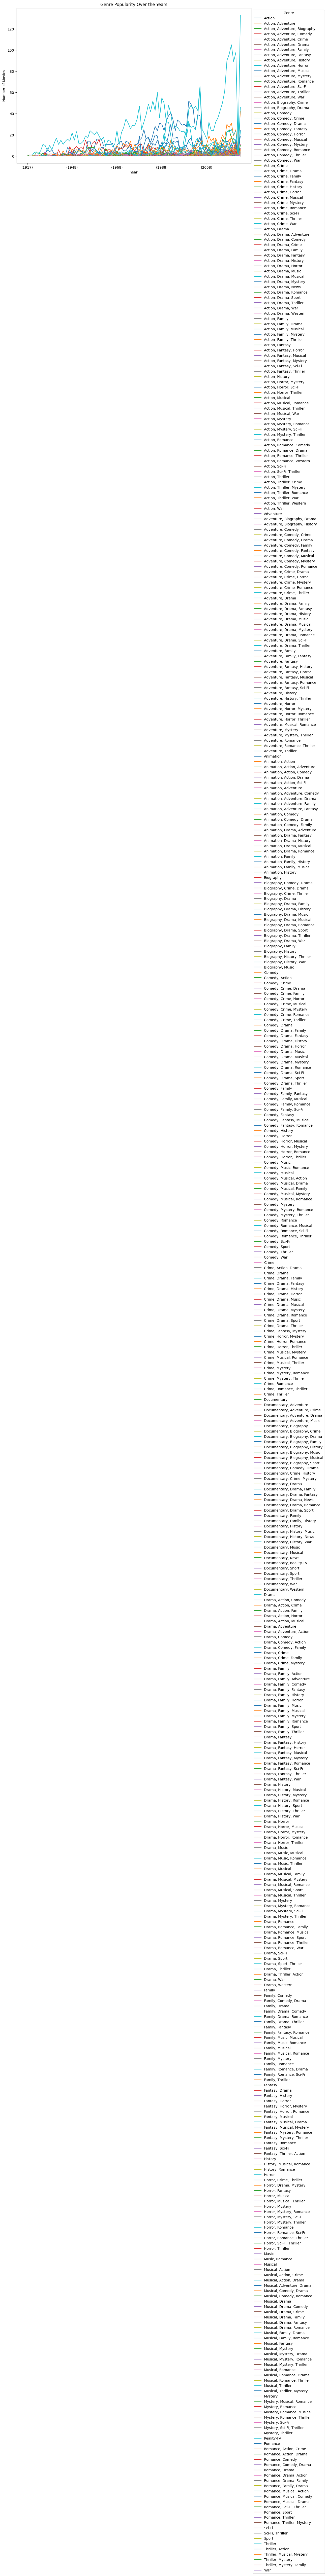

In [40]:
# Plot the pivot table
plt.figure(figsize=(12, 8))
genre_counts_by_year.plot(ax=plt.gca())  # Using gca() to get current axes for plotting
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Genre Popularity Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
# Calculating the sum of null values in each column
null_values_count = df.isnull().sum()

In [42]:
# Displaying the count of null values in each column
print(null_values_count)

Name                   0
Year                   0
Duration               0
Genre               1877
Rating                 0
Votes               7589
Director             525
Actor 1             1617
Actor 2             2384
Actor 3             3144
Duration_numeric       0
Duration_unit          0
dtype: int64


In [43]:
# Read the CSV file into a DataFrame named 'train'
train = pd.read_csv("C:\\Users\\sahil\\CODSOFT\\MOVIE RATING PREDICTION WITH PYTHON\\IMDb Movies India.csv", encoding='latin1')

In [44]:
# Copying the 'Genre' column from 'train' to 'df'
df['Genre'] = train['Genre'].copy()

In [45]:
# Fill missing values in 'Genre' column based on mode of genres for each year
fill_mode = lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df['Genre'].fillna(df.groupby('Year')['Genre'].transform(fill_mode), inplace=True)

In [46]:
# Grouping the Frame by 'Year' and calculate the median rating for each year
median_rating_by_year = df.groupby('Year')['Rating'].median()

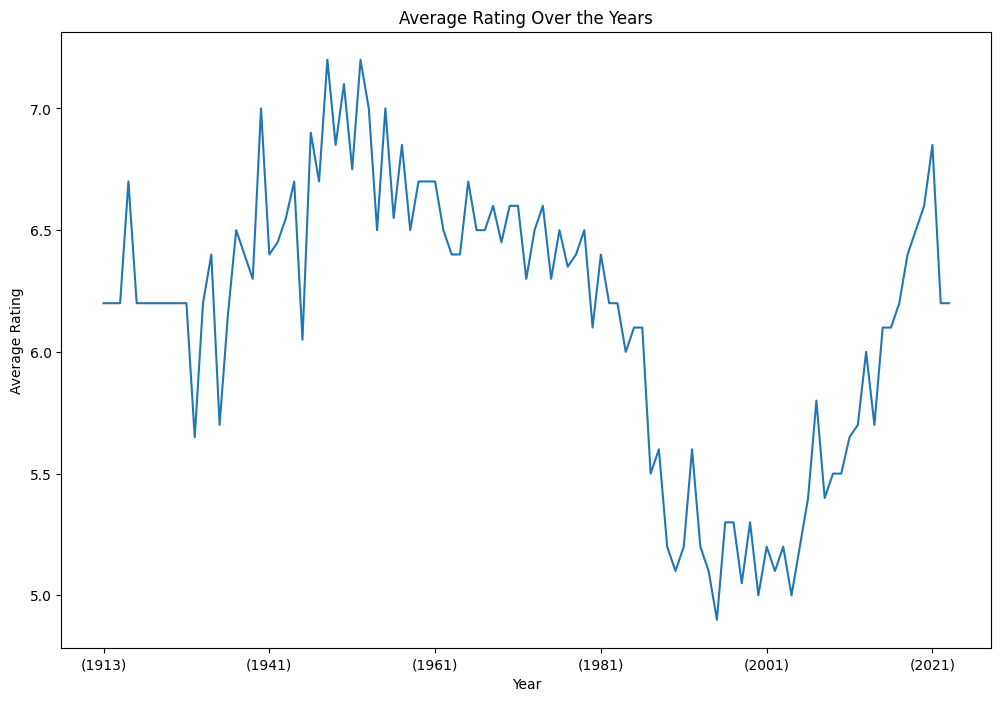

In [47]:
# Plotting the median rating for each year
plt.figure(figsize=(12, 8))
median_rating_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over the Years')
plt.show()

In [48]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
dataframe_shape = df.shape

In [49]:
# Displaying the dimensions of the DataFrame
print("DataFrame dimensions (rows, columns):", dataframe_shape)

DataFrame dimensions (rows, columns): (15509, 12)


In [50]:
# Count the number of null values in the 'Director' column
null_director_count = df['Director'].isnull().sum()

In [51]:
# Displaying the count of null values in the 'Director' column
print("Number of null values in the 'Director' column:", null_director_count)

Number of null values in the 'Director' column: 525


In [52]:
# Calculating the sum of missing values in each column
missing_values = df.isnull().sum()

In [53]:
# Filtering features with missing values (greater than 0) and retrieve their column names
features_with_missing_values = missing_values[missing_values > 0].index.tolist()

In [54]:
# Display the features with missing values
print("Features with missing values:", features_with_missing_values)

Features with missing values: ['Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [55]:
# Iterating over features with missing values
for feature in features_with_missing_values:
    # Calculate the percentage of missing values for the current feature
    missing_percentage = (missing_values[feature] / len(df)) * 100
    # Print the percentage of missing values for the current feature
    print(f"Missing values in {feature}: {missing_percentage:.2f}%")

Missing values in Votes: 48.93%
Missing values in Director: 3.39%
Missing values in Actor 1: 10.43%
Missing values in Actor 2: 15.37%
Missing values in Actor 3: 20.27%


In [56]:
# Grouping the DataFrame by 'Genre' and count the number of missing 'Director' values for each genre
missing_directors_by_genre = df.groupby('Genre')['Director'].apply(lambda x: x.isnull().sum())

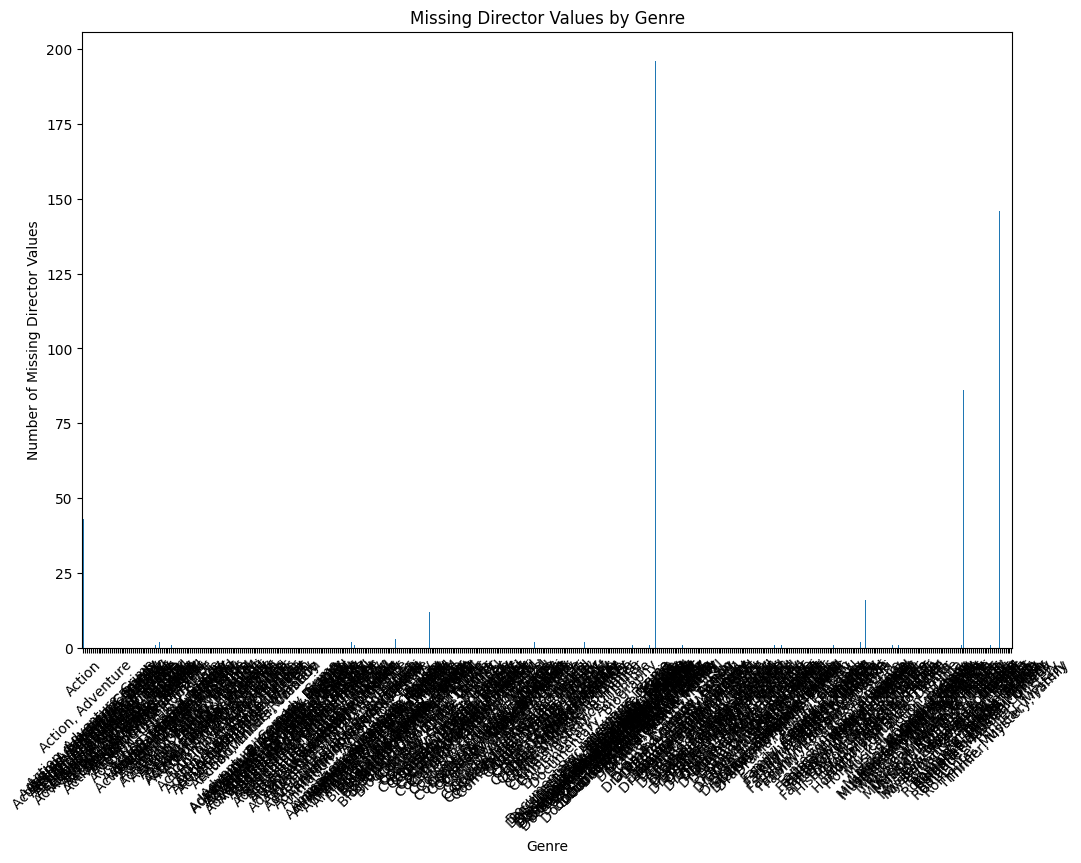

In [57]:
# Plotting the results
plt.figure(figsize=(12, 8))
missing_directors_by_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Missing Director Values')
plt.title('Missing Director Values by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [58]:
# Filling missing values in 'irector' column based on mode of directors for each year
df['Director'].fillna(df.groupby('Year')['Director'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')), inplace=True)

In [59]:
# Calculating the number of unique values in the 'Director' column
unique_director_count = df['Director'].nunique()

In [60]:
# Displaying the number of unique values in the 'Director' column
print("Number of unique directors:", unique_director_count)

Number of unique directors: 5938


In [61]:
# Retrieve an array of unique values in the 'Director' column
unique_directors = df['Director'].unique()

In [62]:
# Displaying the array of unique values
print(unique_directors)

['J.S. Randhawa' 'Gaurav Bakshi' 'Soumyajit Majumdar' ... 'Mozez Singh'
 'Ved Prakash' 'Kiran Thej']


In [63]:
# Calculating the 5th and 95th percentiles of the 'Rating' column
quantiles = df['Rating'].quantile([0.05, 0.95])
print("5th and 95th percentiles of Rating:")
print(quantiles)

5th and 95th percentiles of Rating:
0.05    3.9
0.95    7.5
Name: Rating, dtype: float64


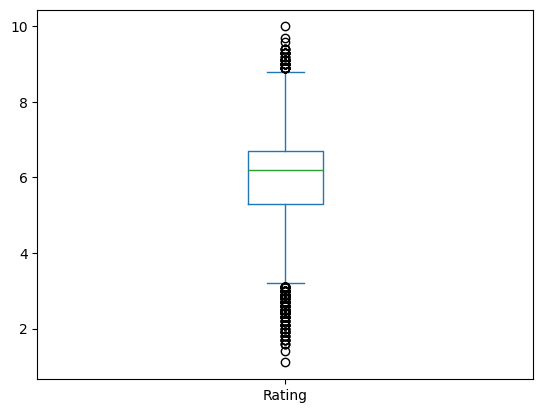

In [64]:
# Plotting a boxplot of the 'Rating' column
df['Rating'].plot(kind='box')
plt.show()

In [65]:
def detect_outliers(df, column):
    # Calculating the mean and standard deviation of the column
    mean = df[column].mean()
    std = df[column].std()

    # Calculating the z-score for each value in the column
    z_scores = (df[column] - mean) / std

    # Identifing the values that are more than 3 standard deviations away from the mean
    outliers = df[z_scores > 3]

    # Returning the outliers
    return outliers

In [66]:
# Detect outliers in the 'Rating' column of the DataFrame 'df'
outliers = detect_outliers(df, 'Rating')

In [67]:
print(outliers)

                                   Name    Year Duration  \
1314                       Ashok Vatika  (2018)   97 min   
1729                           Baikunth  (2021)   72 min   
2563                              Breed  (2020)        0   
5077                       Gho Gho Rani  (2019)  105 min   
5125                        God of gods  (2019)   90 min   
5410                         Half Songs  (2021)   79 min   
6852                               June  (2021)   93 min   
8339                    Love Qubool Hai  (2020)   94 min   
8344                       Love Sorries  (2021)  101 min   
8564   Mahakaleshwar - Legends of Shiva  (2019)        0   
9105                              Meher  (2020)        0   
11704                          Ram-Path  (2017)        0   
11843                           Refl3ct  (2021)   65 min   
12673                Secrets of Sinauli  (2021)   56 min   
13231                        Sindhustan  (2019)   64 min   
14222               The Reluctant Crime 

In [68]:
# Calculating the skewness of the 'Rating' column
rating_skewness = df['Rating'].skew()

In [69]:
# Displaying the skewness of the 'Rating' column
print("Skewness of the 'Rating' column:", rating_skewness)

Skewness of the 'Rating' column: -0.6540512819642407


In [70]:
# Creating a LabelEncoder object
encoder = LabelEncoder()

# Fitting the encoder to the 'Genre' column
encoder.fit(df['Genre'])

# Transforming the 'Genre' column using the encoder
df['Genre'] = encoder.transform(df['Genre'])

In [71]:
# Renaming columns 'Actor 1', 'Actor 2', and 'Actor 3' to 'First Actor', 'Second Actor', and 'Third Actor', respectively
df.rename(columns={'Actor 1': 'First Actor', 'Actor 2': 'Second Actor', 'Actor 3': 'Third Actor'}, inplace=True)

In [72]:
# Converting the 'Genre' column to categorical data type
df['Genre'] = df['Genre'].astype('category')

In [73]:
# Creating a new column 'Genre_encoded' containing the encoded numerical representation of 'Genre'
df['Genre_encoded'] = df['Genre'].cat.codes

In [74]:
# Displaying the first few values of the 'Genre_encoded' column
print(df['Genre_encoded'].head())

0    299
1    299
2    351
3    228
4    299
Name: Genre_encoded, dtype: int16


In [75]:
# Converting the 'First Actor' column to categorical data type and create 'First Actor_encoded' column
df['First Actor'] = df['First Actor'].astype('category')
df['First Actor_encoded'] = df['First Actor'].cat.codes

In [76]:
# Converting the 'Second Actor' column to categorical data type and create 'Second Actor_encoded' column
df['Second Actor'] = df['Second Actor'].astype('category')
df['Second Actor_encoded'] = df['Second Actor'].cat.codes

In [77]:
# Converting the 'Third Actor' column to categorical data type and create 'Third Actor_encoded' column
df['Third Actor'] = df['Third Actor'].astype('category')
df['Third Actor_encoded'] = df['Third Actor'].cat.codes

In [78]:
# Converting the 'Director' column to categorical data type
df['Director'] = df['Director'].astype('category')

In [79]:
# Creating a new column 'Director_encoded' containing the encoded numerical representation of 'Director'
df['Director_encoded'] = df['Director'].cat.codes

In [80]:
# Displaying the first few values of the 'Director_encoded' column
print(df['Director_encoded'].head())

0    1926
1    1548
2    5123
3    3319
4     385
Name: Director_encoded, dtype: int16


In [81]:
# Defining features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model using mean absolute error (MAE)
maee = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", maee)

Mean Absolute Error: 0.8390551689414232


In [82]:
# Defining features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model using mean absolute error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (Random Forest):", mae_rf)

Mean Absolute Error (Random Forest): 0.7681112471647064


In [83]:
# Defining features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the Gradient Boosting Regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model using mean absolute error (MAE)
mae_gb = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (Gradient Boosting):", mae_gb)

Mean Absolute Error (Gradient Boosting): 0.7620653690617092


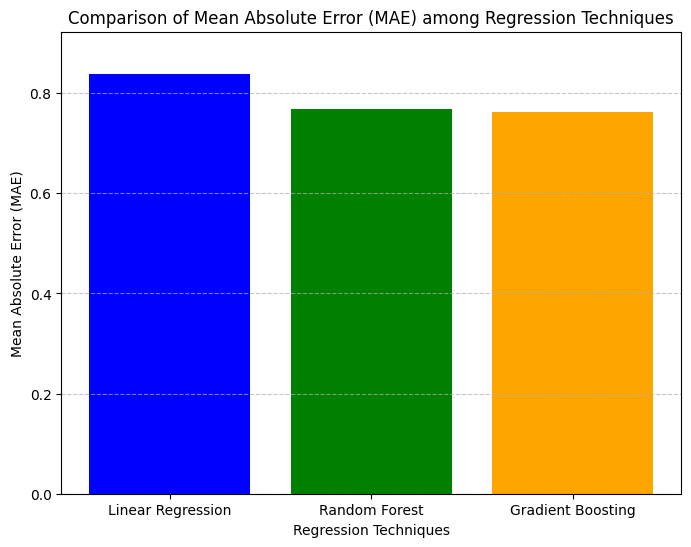

In [84]:
mae_values = [maee, mae_rf, mae_gb]  # MAE values for Linear Regression, Random Forest, and Gradient Boosting
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']  # Names of the regression techniques

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])

# Adding labels and title
plt.xlabel('Regression Techniques')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Regression Techniques')

# Setting y-axis limit slightly above the maximum MAE value for better visualization
plt.ylim(0, max(mae_values) * 1.1)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

In [85]:
print("Mean Absolute Error (Linear Regression):", maee)
print("Mean Absolute Error (RandomForestRegressor):", mae_rf)
print("Mean Absolute Error (GradientBoostingRegressor):", mae_gb)

Mean Absolute Error (Linear Regression): 0.8390551689414232
Mean Absolute Error (RandomForestRegressor): 0.7681112471647064
Mean Absolute Error (GradientBoostingRegressor): 0.7620653690617092


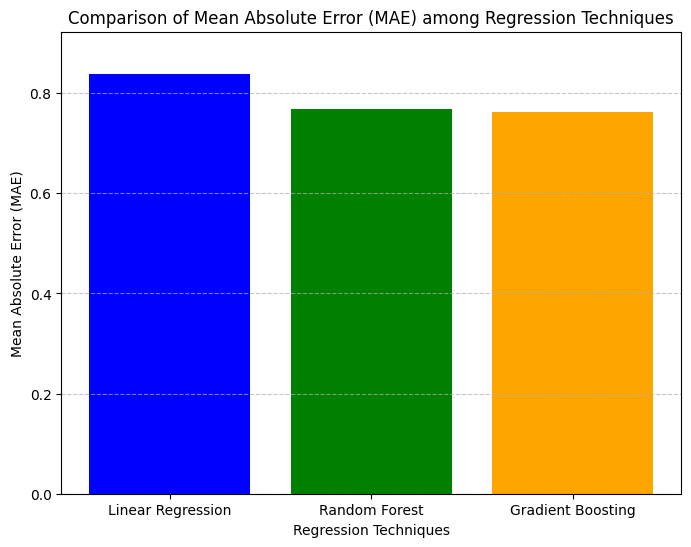

Mean Absolute Error (Linear Regression): 0.8390551689414232
Mean Absolute Error (RandomForestRegressor): 0.7681112471647064
Mean Absolute Error (GradientBoostingRegressor): 0.7620653690617092


In [86]:
mae_values = [maee, mae_rf, mae_gb]
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.xlabel('Regression Techniques')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Regression Techniques')
plt.ylim(0, max(mae_values) * 1.1)  # Set ylim slightly above max value for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Mean Absolute Error (Linear Regression):", maee)
print("Mean Absolute Error (RandomForestRegressor):", mae_rf)
print("Mean Absolute Error (GradientBoostingRegressor):", mae_gb)

In [89]:
# prompt: Compare the current maerf to historical performance

# Save the current maerf
best_mae_rf = mae_rf

# Load the historical maerf values from a file
with open('mae_rf_history.txt', 'r') as f:
  historical_mae_rf = f.readlines()

# Convert the historical maerf values to floats
historical_mae_rf = [float(x) for x in historical_mae_rf]

# Compare the current maerf to the historical values
print("Current mae_rf:", mae_rf)
print("Historical mae_rf:")
for value in historical_mae_rf:
  print(value)

# Check if the current maerf is better than the historical values
if mae_rf < min(historical_mae_rf):
  print("Current mae_rf is the best so far!")

# Append the current maerf to the historical maerf file
with open('mae_rf_history.txt', 'a') as f:
  f.write(str(mae_rf) + '\n')

Current mae_rf: 0.7681112471647064
Historical mae_rf:
0.7681112471647064


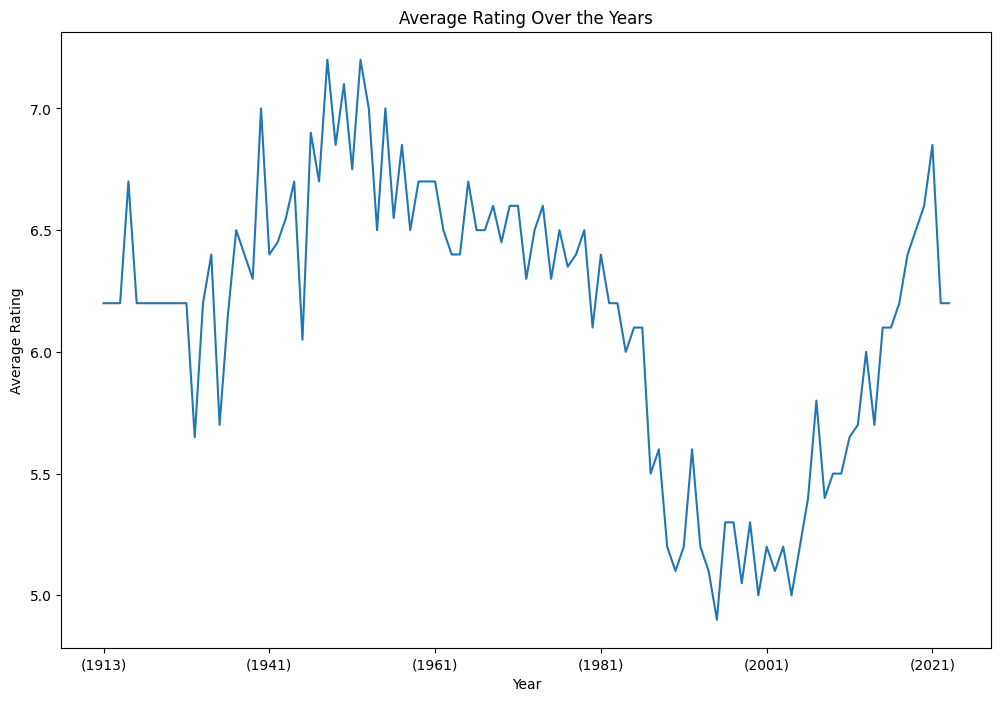

In [90]:
# Plotting Average Rating Over the Years
df.groupby('Year')['Rating'].median().plot(figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over the Years')
plt.show()

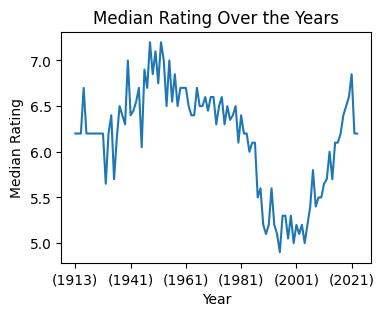

In [91]:
# Plotting Median Rating Over the Years
df.groupby('Year')['Rating'].median().plot(figsize=(4, 3))
plt.xlabel('Year')
plt.ylabel('Median Rating')
plt.title('Median Rating Over the Years')
plt.show()

In [121]:
# Remove commas from the "Votes" column
df["Votes"] = pd.to_numeric(df["Votes"].str.replace(',', ''), errors='coerce')

In [134]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df[['Rating', 'Votes']] = imputer.fit_transform(df[['Rating', 'Votes']])

In [135]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20, 6))
    plt.scatter(df[x].astype(str), df[y].astype(str), edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot of X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

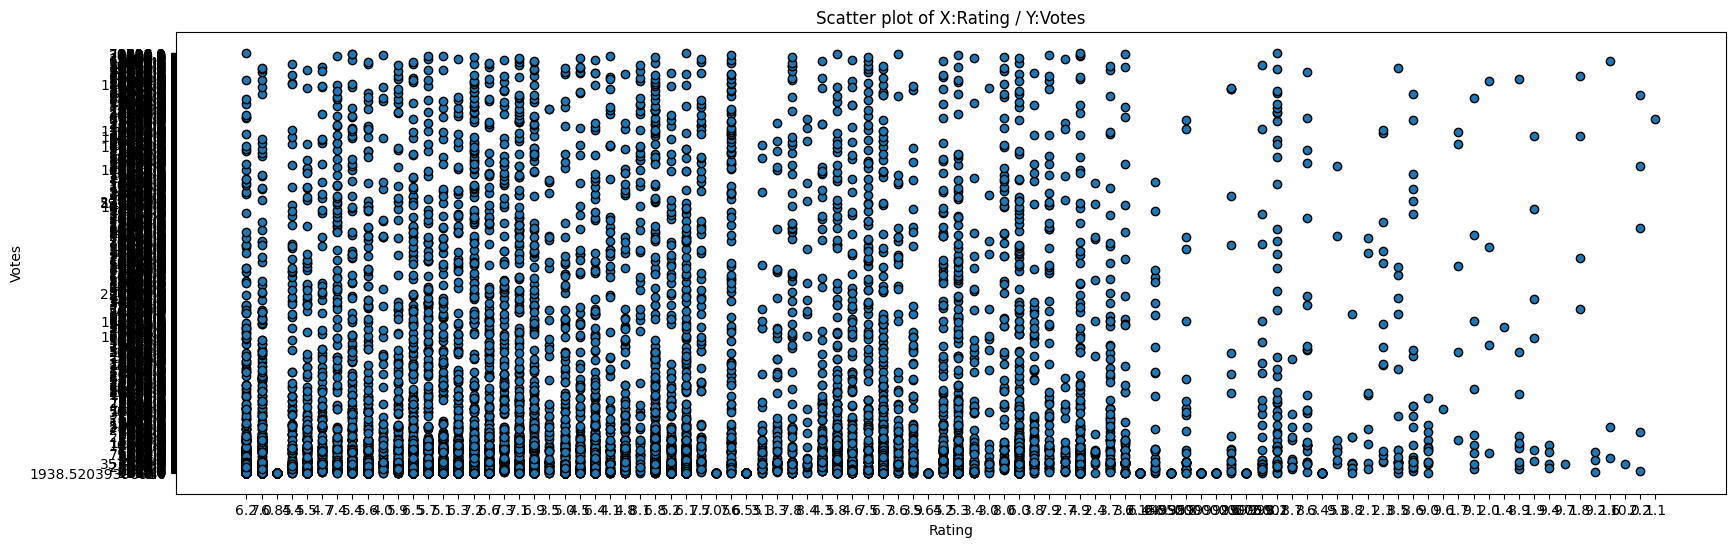

In [136]:
# Scatter plot of Rating vs Votes
Scatter("Rating", "Votes")

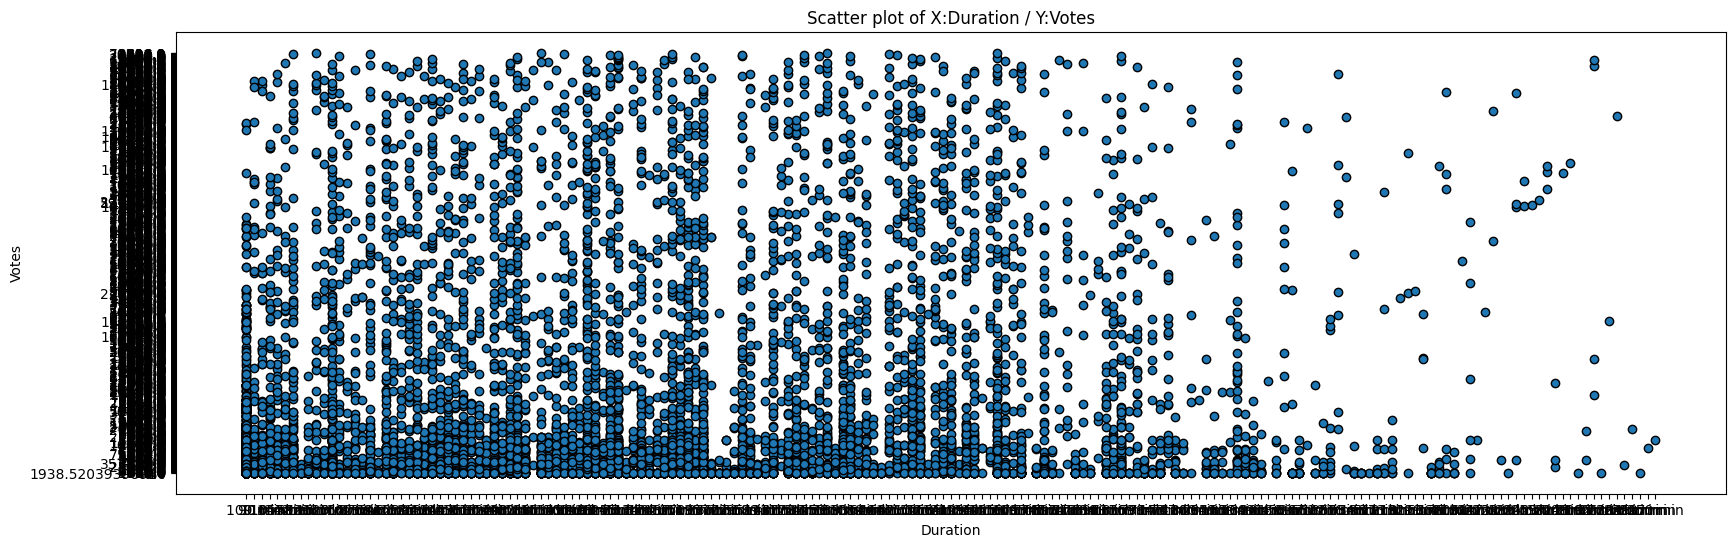

In [137]:
# Scatter plot of Duration vs Votes
Scatter("Duration", "Votes")

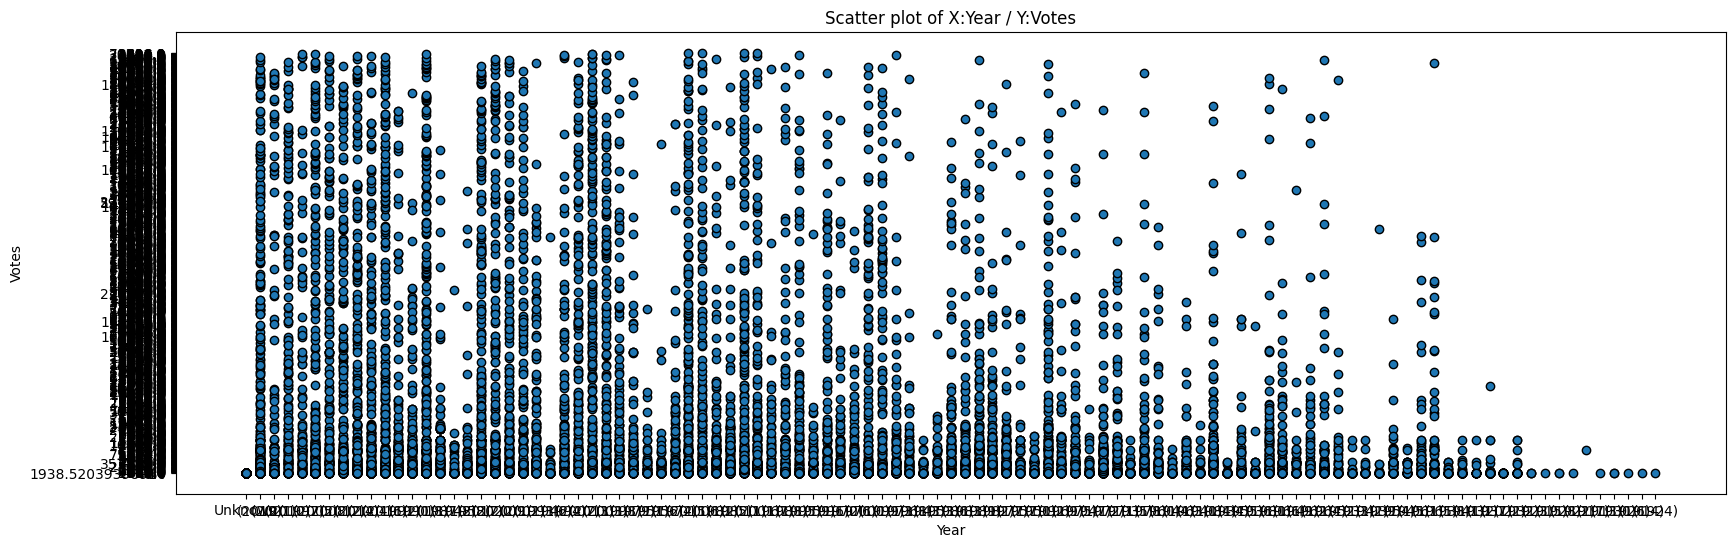

In [138]:
# Scatter plot of Year vs Votes
Scatter("Year", "Votes")

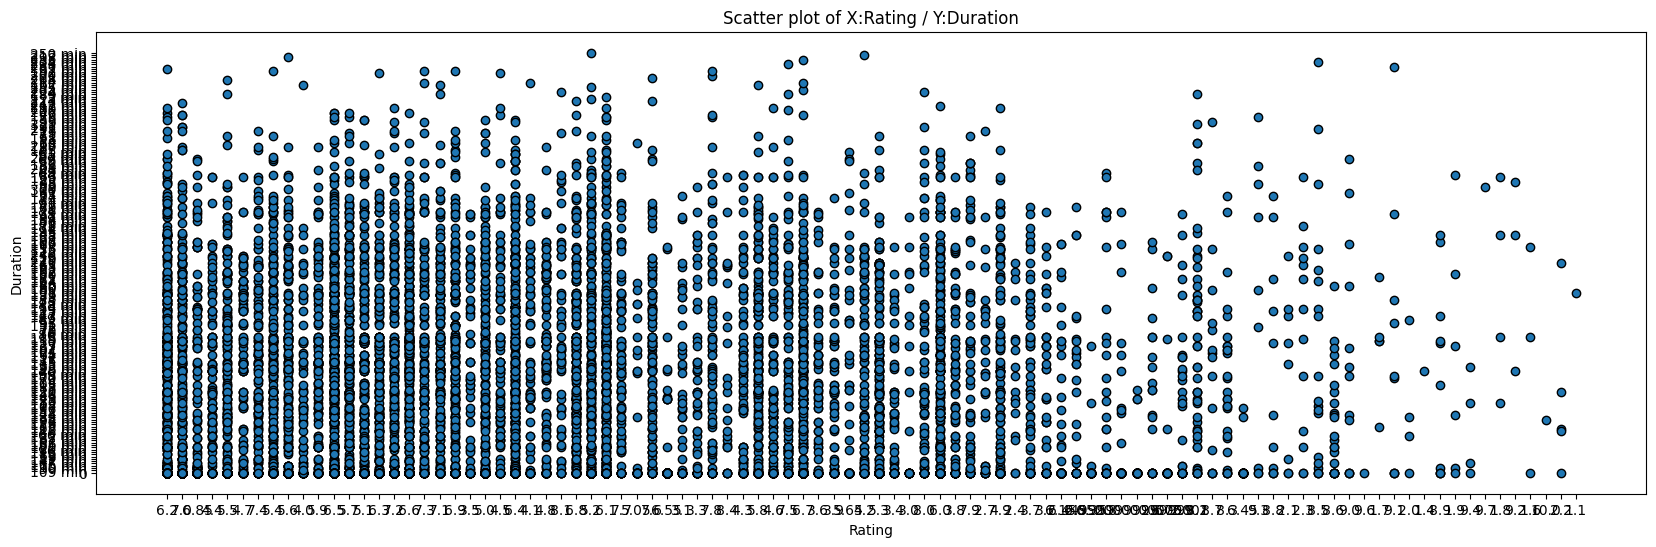

In [139]:
# Scatter plot of Rating vs Duration
Scatter("Rating", "Duration")

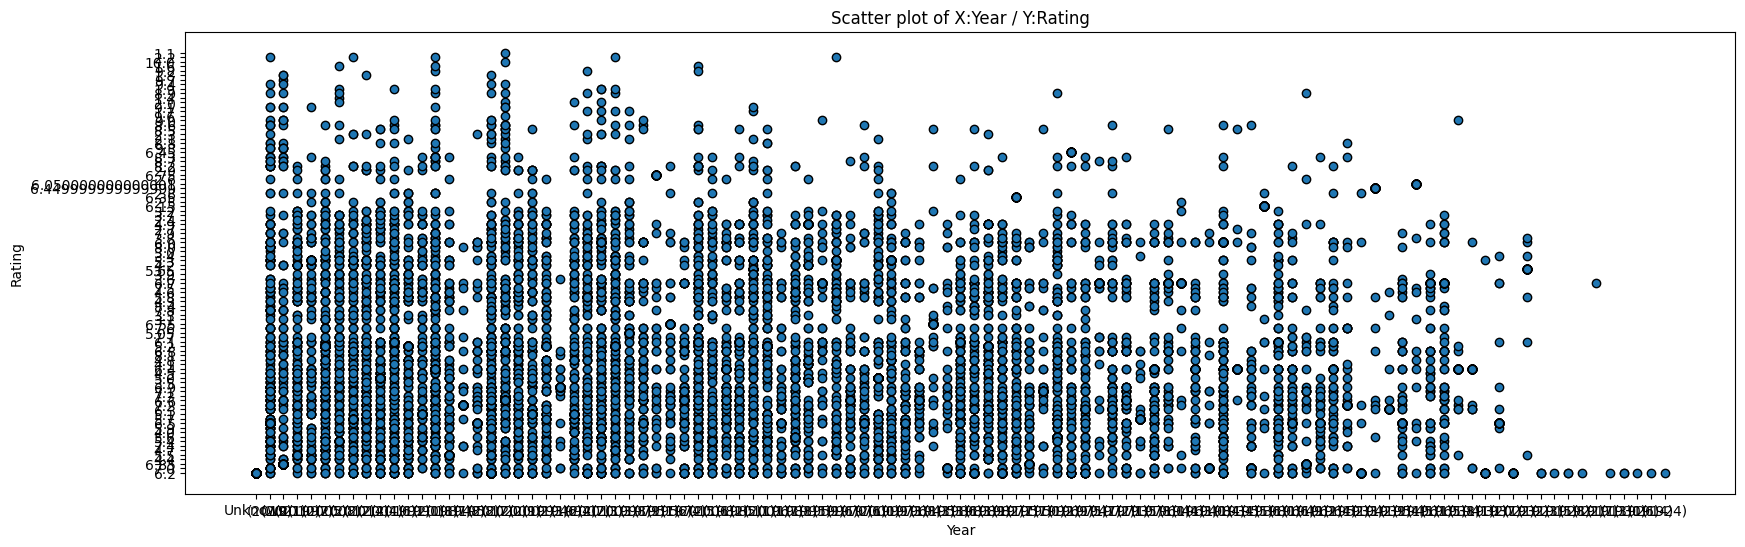

In [140]:
# Scatter plot of Year vs Rating
Scatter("Year", "Rating")

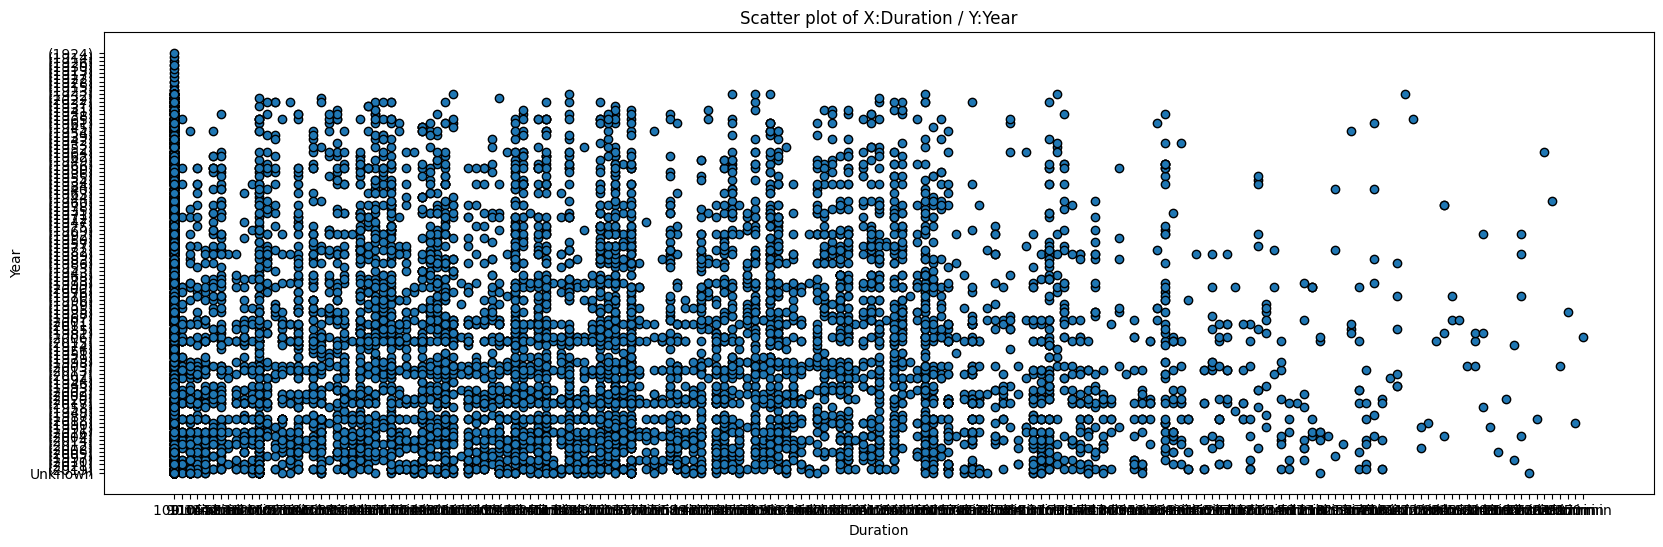

In [141]:
# Scatter plot of Duration vs Year
Scatter("Duration", "Year")

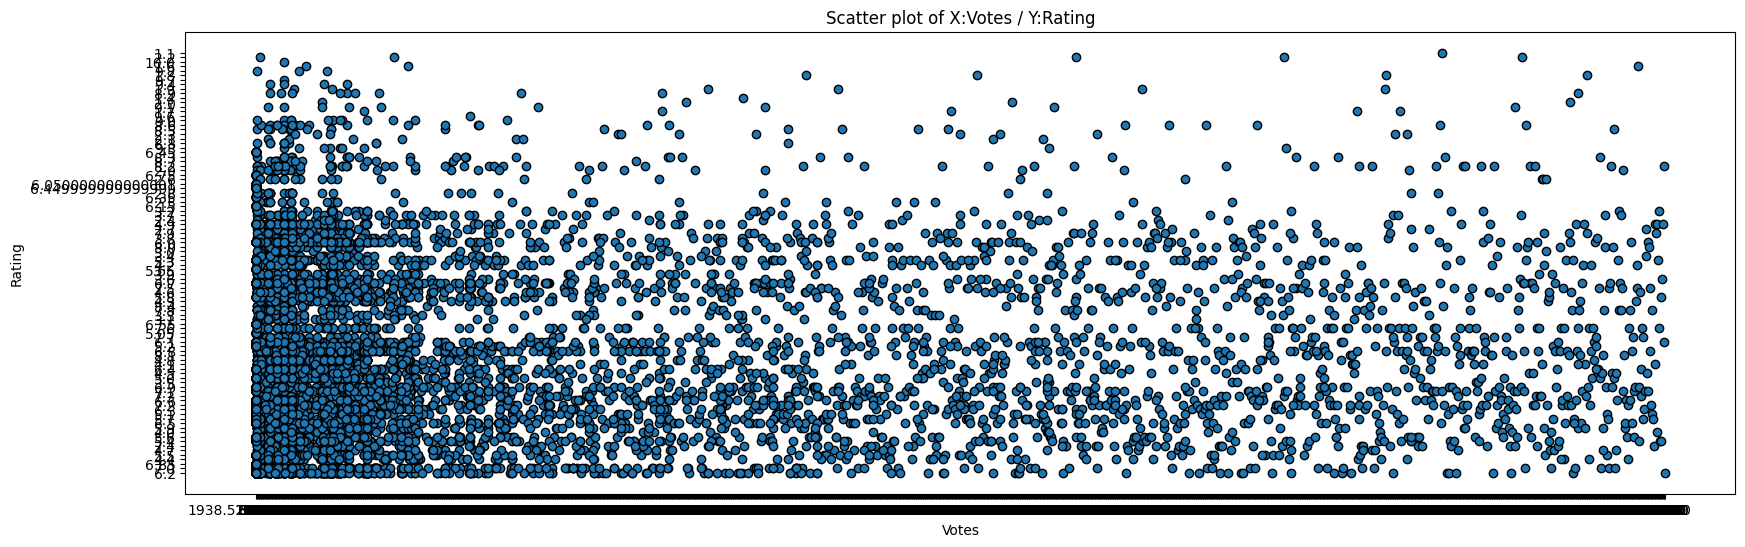

In [142]:
# Scatter plot of Votes vs Rating
Scatter("Votes", "Rating")

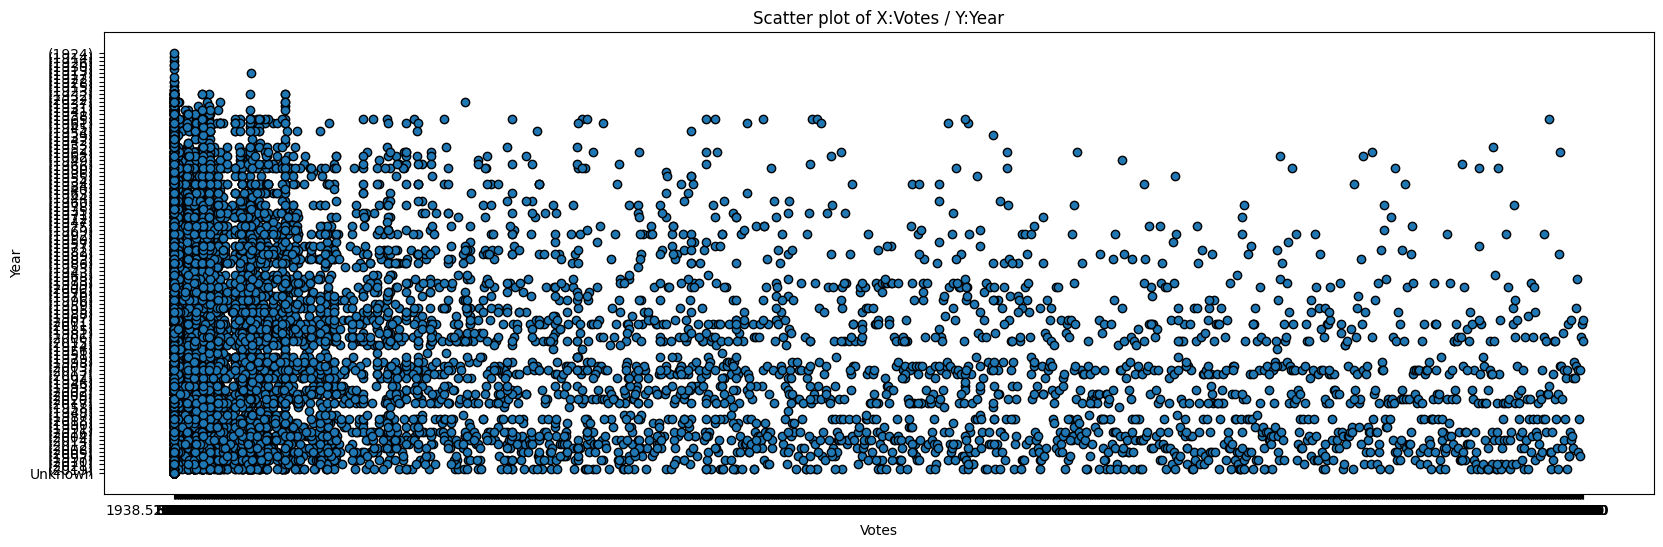

In [143]:
# Scatter plot of Votes vs Year
Scatter("Votes", "Year")

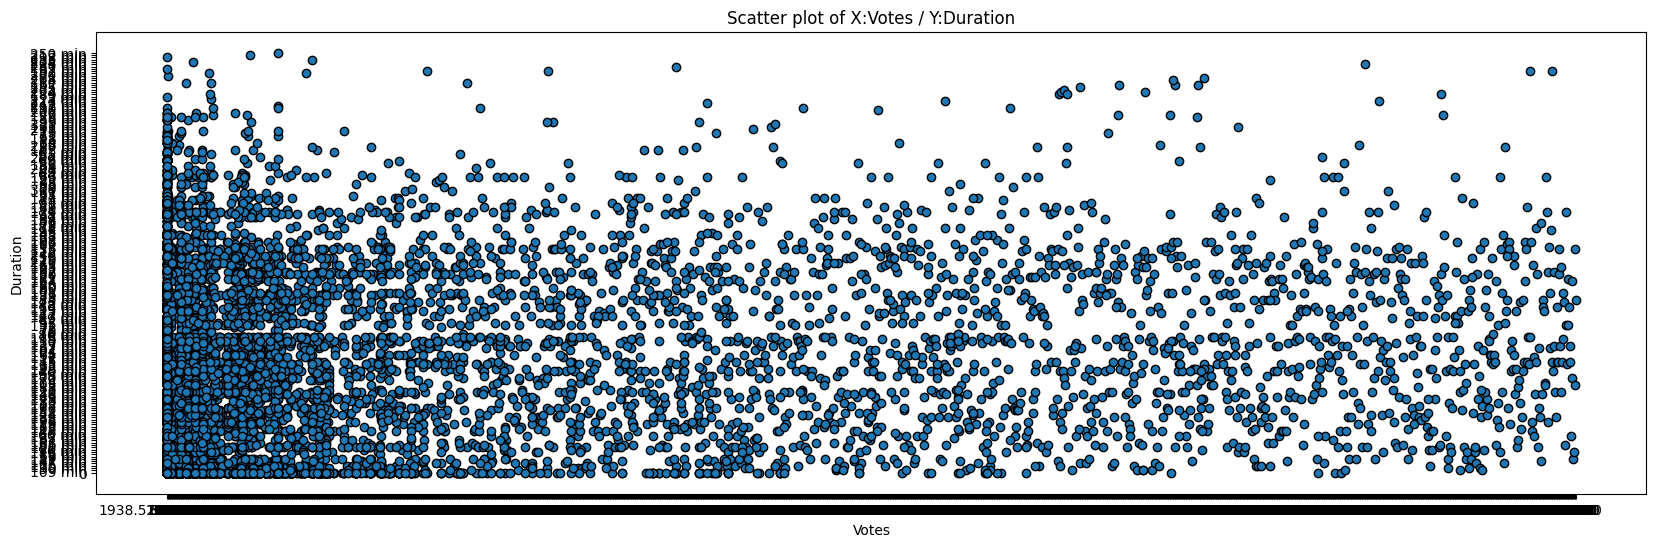

In [144]:
# Scatter plot of Votes vs Duration
Scatter("Votes", "Duration")

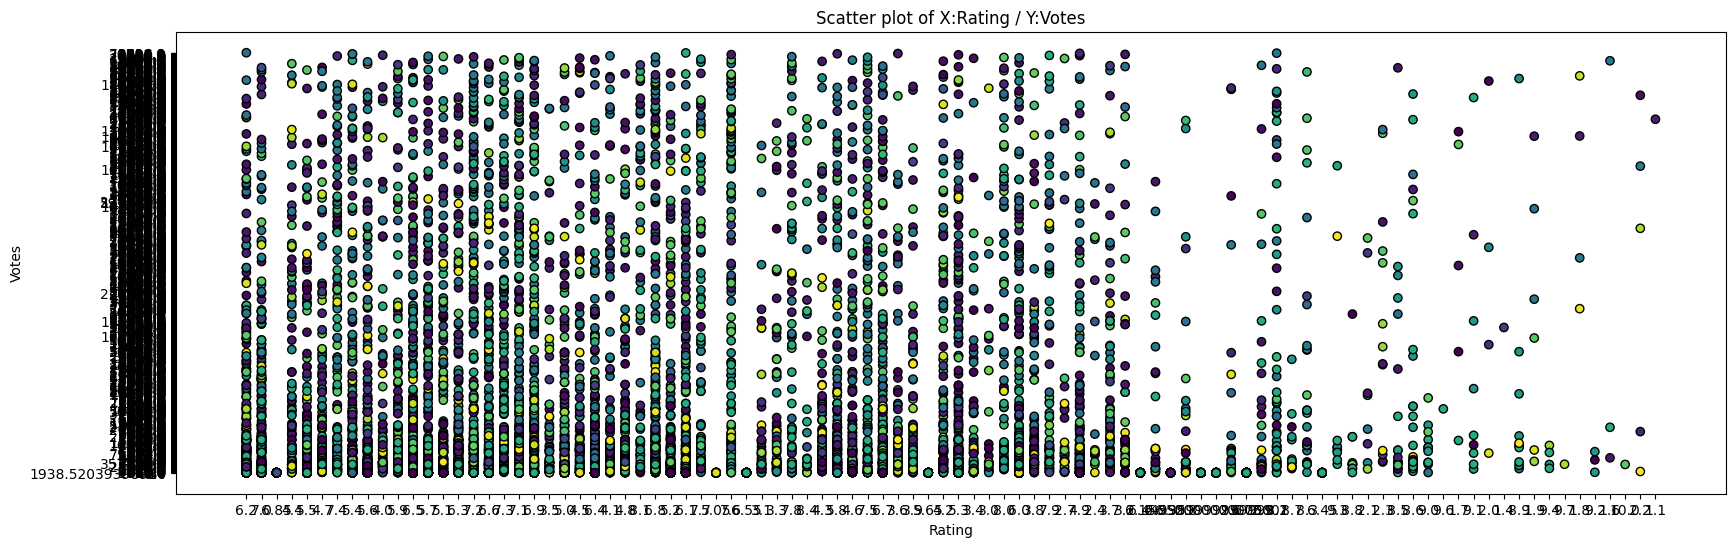

In [145]:
# Scatter plot of Rating vs Votes with color based on Genre
Scatter("Rating", "Votes", c=df["Genre"])

In [146]:
# K-means clustering for Rating and Votes
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[["Rating", "Votes"]])
df["Cluster"] = kmeans.predict(df[["Rating", "Votes"]])

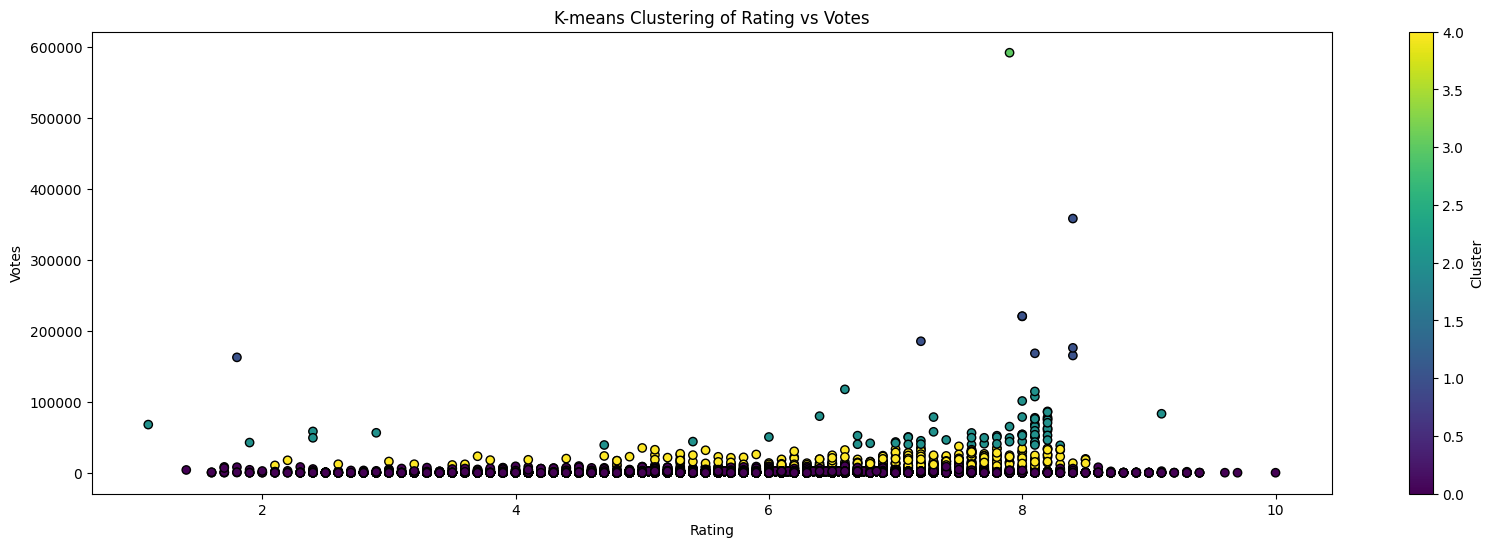

In [147]:
# Scatter plot of Rating vs Votes with K-means clustering
plt.figure(figsize=(20, 6))
plt.scatter(df["Rating"], df["Votes"], c=df["Cluster"], cmap='viridis', edgecolor='k')
plt.title("K-means Clustering of Rating vs Votes")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.colorbar(label='Cluster')
plt.show()

In [151]:
# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df[["Rating", "Votes"]])

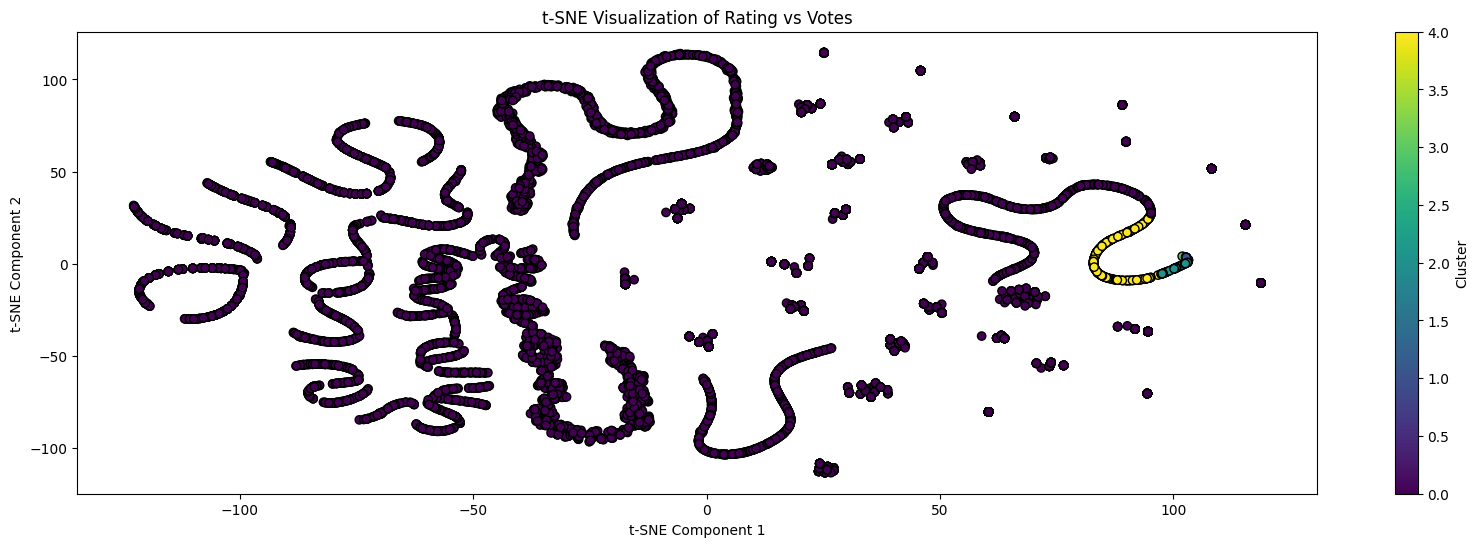

In [152]:
# Scatter plot of t-SNE results
plt.figure(figsize=(20, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df["Cluster"], cmap='viridis', edgecolor='k')
plt.title("t-SNE Visualization of Rating vs Votes")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [153]:
print("End of program")

End of program
